[*********************100%%**********************]  1 of 1 completed


Stock data fetched for AAPL.
Inflation data fetched successfully.


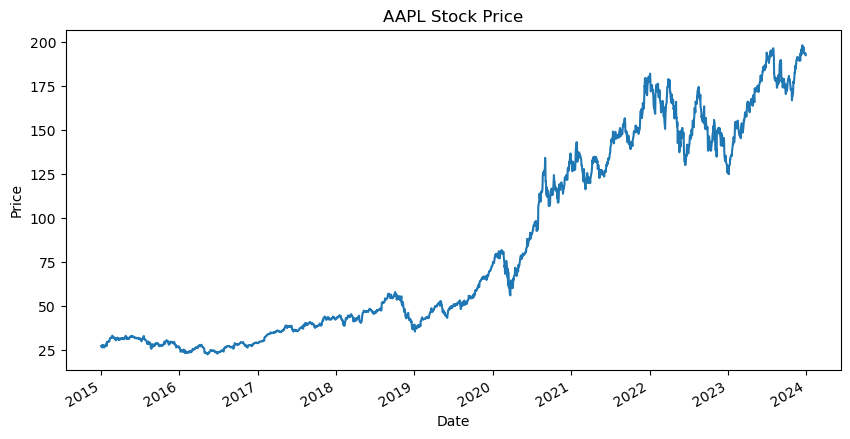

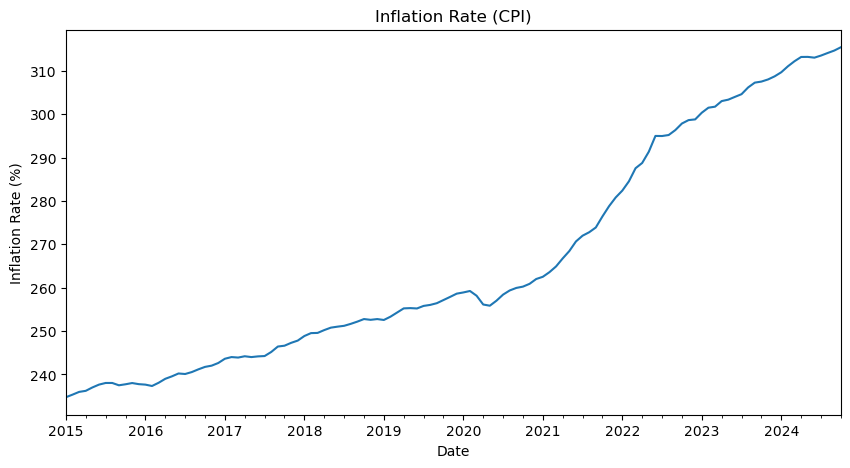

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from fredapi import Fred

# Define StockAnalyzer class
class StockAnalyzer:
    def __init__(self, ticker, start_date, end_date, fred_api_key):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.fred = Fred(api_key=fred_api_key)
        self.stock_data = None
        self.inflation_data = None

    def fetch_stock_data(self):
        """
        Fetch stock data using yfinance.
        """
        try:
            self.stock_data = yf.download(self.ticker, start=self.start_date, end=self.end_date)
            print(f"Stock data fetched for {self.ticker}.")
        except Exception as e:
            print(f"Error fetching stock data: {e}")

    def fetch_inflation_data(self, fred_series_id):
        """
        Fetch inflation data from FRED using the provided series ID.
        """
        try:
            self.inflation_data = self.fred.get_series(fred_series_id, observation_start=self.start_date)
            print("Inflation data fetched successfully.")
        except Exception as e:
            print(f"Error fetching inflation data: {e}")

    def plot_stock_data(self):
        """
        Plot the stock data.
        """
        if self.stock_data is not None:
            self.stock_data['Close'].plot(title=f"{self.ticker} Stock Price", figsize=(10, 5))
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.show()
        else:
            print("Stock data not available for plotting.")

    def plot_inflation_data(self):
        """
        Plot the inflation data.
        """
        if self.inflation_data is not None:
            self.inflation_data.plot(title="Inflation Rate (CPI)", figsize=(10, 5))
            plt.xlabel('Date')
            plt.ylabel('Inflation Rate (%)')
            plt.show()
        else:
            print("Inflation data not available for plotting.")

# Main script
if __name__ == "__main__":
    # Define user parameters
    ticker = "AAPL"  # Example stock ticker
    start_date = "2015-01-01"
    end_date = "2024-01-01"
    fred_api_key = "FREDAPI KEY"  # Replace with your FRED API key
    fred_series_id = "CPIAUCSL"  # Consumer Price Index for All Urban Consumers: All Items

    # Create StockAnalyzer object
    analyzer = StockAnalyzer(ticker, start_date, end_date, fred_api_key)

    # Fetch data
    analyzer.fetch_stock_data()
    analyzer.fetch_inflation_data(fred_series_id)

    # Plot data
    analyzer.plot_stock_data()
    analyzer.plot_inflation_data()